In [5]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



In [7]:
from keras.datasets import mnist

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [9]:
x_train[310].shape

(28, 28)

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [11]:
y_train[310]

1

In [12]:
from keras.utils import np_utils

In [13]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [14]:
y_train[310]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D,Dropout
import keras.optimizers

from keras.utils import np_utils
from keras.optimizers import SGD
from keras.models import Model

In [17]:
model = Sequential()

model.add(Conv2D(10,(5,5), padding='same',input_shape =(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(20,(5,5),padding='same'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(20,(5,5),padding='same'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(30))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Dropout(0.25))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.compile(loss="categorical_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        5020      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
__________

In [1]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'model' is not defined

In [20]:
model.fit(x_train, y_train, batch_size=100, epochs=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
60000/60000 [==============================] - 50s 839us/step - loss: 0.7986 - acc: 0.7031
Epoch 2/2
60000/60000 [==============================] - 52s 868us/step - loss: 0.4587 - acc: 0.8033


In [21]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 4s 408us/step
loss: 0.06733243902707473
正確率 0.9786


In [22]:
from tensorflow.python.keras.callbacks import TensorBoard
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )
tsb=TensorBoard(log_dir='./logs')
history_adam = model.fit(x_train,y_train,batch_size=32,epochs=2,validation_split=0.2,callbacks=[tsb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 51s 1ms/step - loss: 0.4233 - acc: 0.8110 - val_loss: 0.0576 - val_acc: 0.9824
Epoch 2/2
48000/48000 [==============================] - 51s 1ms/step - loss: 0.3960 - acc: 0.8181 - val_loss: 0.0456 - val_acc: 0.9868


In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.plot(history_adam.history["acc"])
plt.plot(history_adam.history["val_acc"])
plt.title("model2 training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training data accuracy", "testing data accuracy"], loc = "best")
plt.show()


NameError: name 'history_adam' is not defined

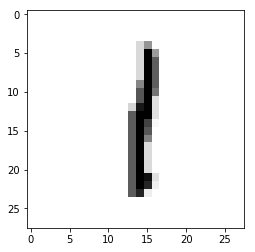

In [86]:
X=x_train[310].reshape(28,28)
plt.imshow(X,cmap='Greys')